In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [2]:
df=pd.read_csv("Titanic_train.csv")

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [68]:
df["Fare"]

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [69]:
df.drop("PassengerId",axis=1,inplace=True)
df.drop("Name",axis=1,inplace=True)
df.drop("Ticket",axis=1,inplace=True)
df.drop("Cabin",axis=1,inplace=True)


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [71]:
df.dropna(inplace=True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [73]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<Axes: xlabel='Age', ylabel='SibSp'>

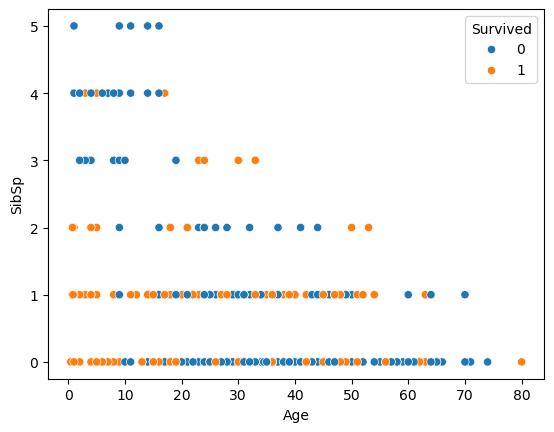

In [ ]:
sns.scatterplot(df,x="Age",y="SibSp",hue="Survived") #check relation 

In [79]:
pd.crosstab(df['Sex'], df['Survived'], normalize='index')

Survived,0,1
Sex,,
female,0.247104,0.752896
male,0.794702,0.205298


In [80]:
pd.crosstab(df['Pclass'], df['Survived'], normalize='index')


Survived,0,1
Pclass,,
1,0.347826,0.652174
2,0.520231,0.479769
3,0.760563,0.239437


In [81]:
pd.crosstab(df['Embarked'], df['Survived'], normalize='index')


Survived,0,1
Embarked,,
C,0.392308,0.607692
Q,0.714286,0.285714
S,0.637184,0.362816


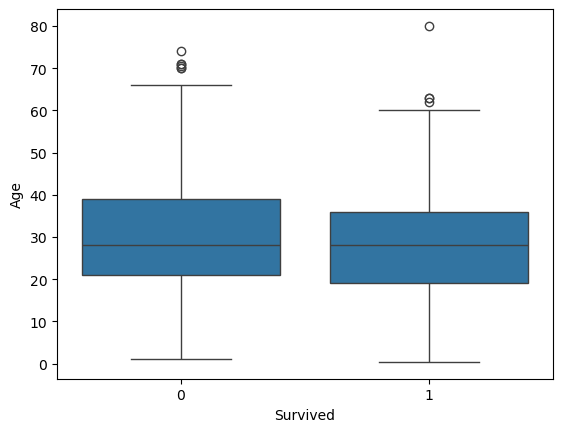

In [82]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.show()    # This graph shows Age is not empect strongly on survival rate.  

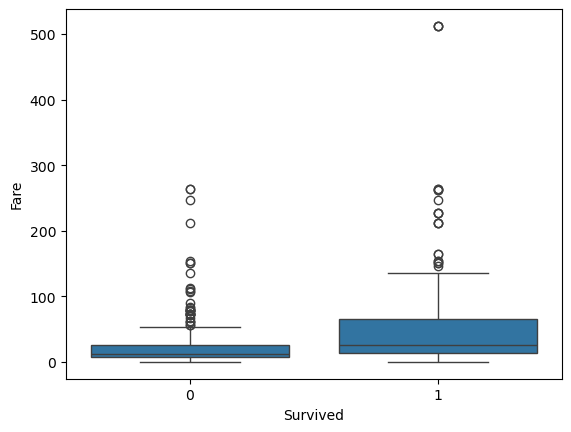

In [83]:
sns.boxplot(x='Survived', y='Fare', data=df)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #Encoding 

In [ ]:
val = le.fit_transform(df.Sex) #Lable encoding on Sex column

In [86]:
df["Sex"] = val

In [87]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [ ]:
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder()
OHE = OneHotEncoder(sparse_output=False) # This function change OneHotEncoding into a Array 

In [89]:
OHE.fit(df[['Embarked']])

OneHotEncoder(sparse_output=False)

In [90]:
val = OHE.transform(df[['Embarked']])
val


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [ ]:
feature = OHE.get_feature_names_out()
feature 

array(['Embarked_C', 'Embarked_Q', 'Embarked_S'], dtype=object)

In [ ]:
df[feature]=val
df 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,S,0.0,0.0,1.0
1,1,1,0,38.0,1,0,71.2833,C,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,S,0.0,0.0,1.0
3,1,1,0,35.0,1,0,53.1000,S,0.0,0.0,1.0
4,0,3,1,35.0,0,0,8.0500,S,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,Q,0.0,1.0,0.0
886,0,2,1,27.0,0,0,13.0000,S,0.0,0.0,1.0
887,1,1,0,19.0,0,0,30.0000,S,0.0,0.0,1.0
889,1,1,1,26.0,0,0,30.0000,C,1.0,0.0,0.0


In [ ]:
df.drop("Embarked",axis=1,inplace=True)
df.drop("Embarked_S",axis=1,inplace=True) #Drop Embarked_S column


In [94]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q
0,0,3,1,22.0,1,0,7.2500,0.0,0.0
1,1,1,0,38.0,1,0,71.2833,1.0,0.0
2,1,3,0,26.0,0,0,7.9250,0.0,0.0
3,1,1,0,35.0,1,0,53.1000,0.0,0.0
4,0,3,1,35.0,0,0,8.0500,0.0,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #Standard scaling

In [96]:
df[["Age", "Fare"]] = scaler.fit_transform(df[["Age", "Fare"]])

In [97]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q
0,0,3,1,-0.527669,1,0,-0.516380,0.0,0.0
1,1,1,0,0.577094,1,0,0.694046,1.0,0.0
2,1,3,0,-0.251478,0,0,-0.503620,0.0,0.0
3,1,1,0,0.369951,1,0,0.350326,0.0,0.0
4,0,3,1,0.369951,0,0,-0.501257,0.0,0.0


In [98]:
x = df.drop("Survived",axis=1)
y = df["Survived"]

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [101]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q
545,1,1,2.372333,0,0,-0.161947,0.0,0.0
86,3,1,-0.941954,1,3,-0.003634,0.0,0.0
328,3,0,0.093760,1,1,-0.265442,0.0,0.0
222,3,1,1.474713,0,0,-0.501257,0.0,0.0
890,3,1,0.162808,0,0,-0.506928,0.0,1.0
...,...,...,...,...,...,...,...,...
529,2,1,-0.458621,2,1,-0.436042,0.0,0.0
873,3,1,1.198523,0,0,-0.483300,0.0,0.0
383,1,0,0.369951,1,0,0.329532,0.0,0.0
616,3,1,0.300903,1,1,-0.381223,0.0,0.0


In [102]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q
173,3,1,-0.596716,0,0,-0.503620,0.0,0.0
25,3,0,0.577094,1,5,-0.060107,0.0,0.0
642,3,0,-1.908622,3,2,-0.126032,0.0,0.0
151,1,0,-0.527669,1,0,0.605517,0.0,0.0
770,3,1,-0.389573,0,0,-0.473848,0.0,0.0
...,...,...,...,...,...,...,...,...
508,3,1,-0.113383,0,0,-0.227636,0.0,0.0
149,2,1,0.853284,0,0,-0.407687,0.0,0.0
844,3,1,-0.872907,0,0,-0.489679,0.0,0.0
52,1,0,1.336618,1,0,0.796990,1.0,0.0


In [103]:
from sklearn.neighbors import KNeighborsClassifier

In [104]:
kn = KNeighborsClassifier(n_neighbors=5,metric="euclidean")

In [105]:
model=kn.fit(x_train,y_train)
model

KNeighborsClassifier(metric='euclidean')

In [106]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [107]:
y_test

173    0
25     1
642    0
151    1
770    0
      ..
508    0
149    0
844    0
52     1
777    1
Name: Survived, Length: 143, dtype: int64

In [108]:
from sklearn.metrics import confusion_matrix
cf= confusion_matrix(y_pred,y_test)
cf

array([[68, 17],
       [12, 46]], dtype=int64)

In [109]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
print(accuracy_score(y_test,y_pred))

0.7972027972027972


In [110]:
print(precision_score(y_test,y_pred))

0.7931034482758621


In [111]:
print(recall_score(y_test,y_pred))

0.7301587301587301


In [112]:
joblib.dump(model,"titanic.joblib")


['titanic.joblib']

In [113]:
joblib.dump(scaler,"titanic_scaler.joblib")

['titanic_scaler.joblib']

In [ ]:
m=joblib.load("titanic.joblib")  # check joblib file

In [115]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q
173,3,1,-0.596716,0,0,-0.503620,0.0,0.0
25,3,0,0.577094,1,5,-0.060107,0.0,0.0
642,3,0,-1.908622,3,2,-0.126032,0.0,0.0
151,1,0,-0.527669,1,0,0.605517,0.0,0.0
770,3,1,-0.389573,0,0,-0.473848,0.0,0.0
...,...,...,...,...,...,...,...,...
508,3,1,-0.113383,0,0,-0.227636,0.0,0.0
149,2,1,0.853284,0,0,-0.407687,0.0,0.0
844,3,1,-0.872907,0,0,-0.489679,0.0,0.0
52,1,0,1.336618,1,0,0.796990,1.0,0.0


In [ ]:
m.predict([[3,1,-0.320526,0,1,-0.161947,0.0,0.0]]) # predict with random values 

e:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)